In [1]:
# ####%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem


### Read NFL-QB csv data ###

In [2]:
nfl_te_file =  "Data/NFLTEDATA_Mod.csv"
nfl_wb_file = "Data/NFLWRDATA_Mod.csv"
nfl_rb_file = "Data/NFLRBDATA_Mod.csv"
nfl_file = "Data/NFLQBDATA_Mod.csv"
nfl_data_df = pd.read_csv(nfl_file)
nfl_data_df.head()

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
0,1,Peyton Manning,1998,2015,18,TOT,NFL,266.0,265.0,6125,...,1953,7.67,7.61,7.17,270.5,186.0,79.0,0.0,43.0,54.0
1,2,Tom Brady,2000,2019,20,NWE,NFL,273.0,271.0,6094,...,2960,7.52,7.81,7.14,262.2,211.0,60.0,0.0,35.0,44.0
2,3,Drew Brees,2001,2019,19,TOT,NFL,266.0,265.0,6621,...,2821,7.61,7.60,7.03,281.4,156.0,109.0,0.0,35.0,49.0
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
4,5,Philip Rivers,2004,2019,16,SDG,NFL,216.0,212.0,4619,...,2552,7.82,7.76,6.99,258.8,120.0,92.0,0.0,26.0,31.0


In [3]:
nfl_data_df.columns

Index(['Rk', 'Player', 'From', 'To', 'No. of Season', 'Tm', 'Lg', 'G', 'GS',
       'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'Int', 'Pick6', 'TD%', 'Int%',
       'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A', 'ANY/A', 'Y/G', 'W', 'L', 'T',
       '4QC', 'GWD'],
      dtype='object')

In [4]:
filtered_column =nfl_data_df[nfl_data_df['To']!=2019]
filtered_column.head()

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
0,1,Peyton Manning,1998,2015,18,TOT,NFL,266.0,265.0,6125,...,1953,7.67,7.61,7.17,270.5,186.0,79.0,0.0,43.0,54.0
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
9,10,Carson Palmer,2004,2017,14,TOT,NFL,182.0,181.0,3941,...,2364,7.33,6.93,6.22,254.1,92.0,88.0,1.0,22.0,35.0
10,11,Vinny Testaverde,1989,2007,19,TOT,NFL,212.0,195.0,3494,...,2560,6.90,6.08,5.33,197.7,85.0,109.0,1.0,27.0,30.0
11,12,Drew Bledsoe,1993,2006,14,TOT,NFL,194.0,193.0,3839,...,3135,6.64,6.01,5.18,230.0,98.0,95.0,0.0,24.0,31.0


In [5]:
trial_data = filtered_column[['Rk', 'Player', 'No. of Season']]

# Convert to DataFrame

mean_data =trial_data.groupby(['Rk', 'Player'], as_index = False)['No. of Season'].mean()
players_season_data = pd.DataFrame(mean_data)

# Preview DataFrame

players_season_data.head()

,Rk,Player,No. of Season
0,1,Peyton Manning,18
1,4,Brett Favre*,20
2,10,Carson Palmer,14
3,11,Vinny Testaverde,19
4,12,Drew Bledsoe,14


In [6]:
std_value_qb = round(players_season_data['No. of Season'].std(),2)
std_value_qb

4.43

In [7]:
mean_value_qb = players_season_data['No. of Season'].mean()
mean_value_qb

5.784653465346534

In [8]:
median_value_qb = players_season_data['No. of Season'].median()
median_value_qb

5.0

In [9]:
# Use numpy to create quartiles
qb_q1 = np.percentile(players_season_data['No. of Season'], 25)
qb_q3 = np.percentile(players_season_data['No. of Season'],75)
print(f"Q1 is {qb_q1}")
print(f"Q3 is {qb_q3}")

Q1 is 2.0
Q3 is 9.0


In [10]:
# Calculate the interquartile range
iqr = (qb_q3 - qb_q1)
print("interquartile range:", iqr)

interquartile range: 7.0


In [11]:
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = qb_q1 - (1.5 * iqr)
lower_boundary

-8.5

In [12]:
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = qb_q3 + (1.5 * iqr)
upper_boundary

19.5

In [13]:
# Check for any lower outliers
arr = players_season_data['No. of Season']
# Check for any upper outliers

In [14]:
# Check for any upper outliers
arr[arr >= upper_boundary]

1    20
Name: No. of Season, dtype: int64

In [15]:
current_players =nfl_data_df.loc[nfl_data_df['To']==2019]
current_players
filtered_players = current_players[current_players['Yds'] >= 10000]
filtered_players.head()


,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
1,2,Tom Brady,2000,2019,20,NWE,NFL,273.0,271.0,6094,...,2960,7.52,7.81,7.14,262.2,211.0,60.0,0.0,35.0,44.0
2,3,Drew Brees,2001,2019,19,TOT,NFL,266.0,265.0,6621,...,2821,7.61,7.60,7.03,281.4,156.0,109.0,0.0,35.0,49.0
4,5,Philip Rivers,2004,2019,16,SDG,NFL,216.0,212.0,4619,...,2552,7.82,7.76,6.99,258.8,120.0,92.0,0.0,26.0,31.0
5,6,Ben Roethlisberger,2004,2019,16,PIT,NFL,218.0,216.0,4651,...,3320,7.82,7.64,6.71,259.4,144.0,71.0,1.0,31.0,42.0
6,7,Eli Manning,2004,2019,16,NYG,NFL,234.0,232.0,4860,...,2839,7.01,6.57,5.91,241.6,116.0,116.0,0.0,27.0,37.0


In [16]:

for row in range(nfl_data_df.shape[0]):
   if nfl_data_df.loc[row,'Player'][-1] == '*':
       nfl_data_df.loc[row,'hof'] = 1
   else:
       nfl_data_df.loc[row,'hof'] = 0
nfl_data_df
test_data = nfl_data_df[nfl_data_df['hof']==1]
test_data

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD,hof
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0,1.0
16,17,Dan Marino*,1989,1999,11,MIA,NFL,155.0,155.0,3101,...,7.13,6.71,6.22,242.0,93.0,62.0,0.0,23.0,31.0,1.0
18,19,Warren Moon*,1989,2000,12,TOT,NFL,140.0,135.0,2929,...,7.15,6.66,5.89,247.5,76.0,59.0,0.0,18.0,26.0,1.0
21,22,Kurt Warner*,1998,2009,12,TOT,NFL,124.0,116.0,2666,...,7.95,7.55,6.71,260.8,67.0,49.0,0.0,7.0,11.0,1.0
22,23,Steve Young*,1989,1999,11,SFO,NFL,131.0,118.0,2309,...,8.24,8.36,7.36,218.8,87.0,31.0,0.0,11.0,14.0,1.0
24,25,John Elway*,1989,1998,10,DEN,NFL,149.0,148.0,2681,...,7.25,6.84,5.86,223.7,94.0,54.0,0.0,17.0,27.0,1.0
30,31,Jim Kelly*,1989,1996,8,BUF,NFL,116.0,116.0,2070,...,7.50,6.85,5.98,221.5,79.0,37.0,0.0,16.0,21.0,1.0
36,37,Troy Aikman*,1989,2000,12,DAL,NFL,165.0,165.0,2898,...,6.99,6.34,5.66,199.6,94.0,71.0,0.0,15.0,20.0,1.0
80,81,Joe Montana*,1989,1994,6,TOT,NFL,54.0,53.0,1087,...,7.58,7.50,6.80,241.1,42.0,11.0,0.0,10.0,13.0,1.0


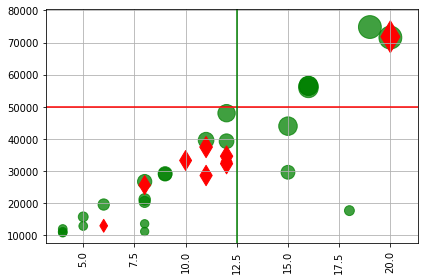

In [17]:
plt.scatter(filtered_players['No. of Season'],filtered_players['Yds'],s = filtered_players['TD'],marker="o",facecolors="green",alpha=0.75)
plt.scatter(test_data['No. of Season'],test_data['Yds'],s = test_data['TD'], marker="d",facecolors="red",alpha=1)
plt.xticks(rotation="vertical")
# plt.xlim(3,20.5)
# plt.ylim(8000, 71000)
plt.axhline(y=50000, color='r', linestyle='-')
plt.axvline(x=12.5, color='g', linestyle='-')
plt.grid()
plt.tight_layout()
plt.show()


### Running Back players Data  1989 - 2019###

In [18]:
#  reading running back players data 
nfl_rb_data_df = pd.read_csv(nfl_rb_file)
#  preview Dataframe
nfl_rb_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
2,3,Frank Gore,2005,2019,15,TOT,NFL,214.0,199.0,3443,15021,4.36,79,70.2
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5


In [19]:
#  dropping currunt players from dataframe column
filtered_rb_column =nfl_rb_data_df[nfl_rb_data_df['To']!=2019]
filtered_rb_column.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5
5,6,Jerome Bettis*,1993,2005,13,TOT,NFL,192.0,153.0,3479,13662,3.93,91,71.2


In [20]:
# finding staderd deviation of running back players
std_rb_value = filtered_rb_column['No of Season'].std()
std_rb_value

3.118859866135235

In [21]:
# finding mean of running back players
mean_rb_value = filtered_rb_column['No of Season'].mean()
mean_rb_value

4.210815047021944

In [22]:
# finding median of running back players
median_rb_value = filtered_rb_column['No of Season'].median()
median_rb_value

3.0

In [23]:
# Use numpy to create quartiles
rb_q1 = np.percentile(filtered_rb_column['No of Season'], 25)
rb_q3 = np.percentile(filtered_rb_column['No of Season'],75)
print(f"Q1 is {rb_q1}")
print(f"Q3 is {rb_q3}")

Q1 is 2.0
Q3 is 6.0


In [24]:
# Calculate the interquartile range
rb_iqr = (rb_q3 - rb_q1)
print("interquartile range:", rb_iqr)

interquartile range: 4.0


In [25]:
# Find lower boundary
rb_lower_boundary = rb_q1 - (1.5 * rb_iqr)
rb_lower_boundary

-4.0

In [26]:
# Find upper boundary
rb_upper_boundary = rb_q3 + (1.5 * rb_iqr)
rb_upper_boundary

12.0

In [27]:
# Check for any upper outliers
rb_arr = filtered_rb_column['No of Season']
rb_arr[rb_arr>= rb_upper_boundary]

0       15
5       13
7       12
9       13
10      12
12      12
13      12
17      12
20      12
21      13
26      12
33      12
123     13
146     12
184     14
199     14
221     14
242     16
244     13
300     12
301     16
375     14
405     16
450     12
517     12
538     12
582     12
711     14
721     13
946     13
989     13
1274    14
1319    14
Name: No of Season, dtype: int64

In [28]:
# Check for any lower outliers
rb_arr[rb_arr<= rb_lower_boundary]

Series([], Name: No of Season, dtype: int64)

In [29]:
#create a new df with only current players
current_rb_df= nfl_rb_data_df[nfl_rb_data_df['To']==2019]
current_rb_df.count()
#extract data of current players who have gained more than 1000 yds by passing
current_rb_highyds_df= current_rb_df[current_rb_df['Yds']>1000]
current_rb_highyds_df.count()
nfl_rb_data_df.shape

(1412, 14)

In [30]:
#find the rows with * in the player name 
for row in range(nfl_rb_data_df.shape[0]):
    if nfl_rb_data_df.loc[row,'Player'][-1] == '*':
        nfl_rb_data_df.loc[row,'hof'] = 1
    else:
        nfl_rb_data_df.loc[row,'hof'] = 0
nfl_rb_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G,hof
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2,1.0
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8,1.0
2,3,Frank Gore,2005,2019,15,TOT,NFL,214.0,199.0,3443,15021,4.36,79,70.2,0.0
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9,1.0
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5,1.0


In [31]:
#extract the hall of fame players into a new df
hof_rb_df = nfl_rb_data_df[nfl_rb_data_df['hof']==1]
hof_rb_df

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G,hof
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2,1.0
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8,1.0
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9,1.0
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5,1.0
5,6,Jerome Bettis*,1993,2005,13,TOT,NFL,192.0,153.0,3479,13662,3.93,91,71.2,1.0
7,8,Marshall Faulk*,1994,2005,12,TOT,NFL,176.0,156.0,2836,12279,4.33,100,69.8,1.0
12,13,Thurman Thomas*,1989,2000,12,TOT,NFL,167.0,145.0,2670,11193,4.19,63,67.0,1.0
35,36,Terrell Davis*,1995,2001,7,DEN,NFL,78.0,77.0,1655,7607,4.60,60,97.5,1.0
68,69,Marcus Allen*,1989,1997,9,TOT,NFL,125.0,75.0,1310,5261,4.02,62,42.1,1.0
136,137,Eric Dickerson*,1989,1993,5,TOT,NFL,56.0,48.0,860,3344,3.89,15,59.7,1.0


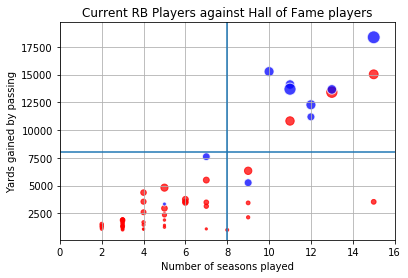

In [32]:
#set x, y axis 
x_axis =current_rb_highyds_df['No of Season']
y_axis= current_rb_highyds_df['Yds']
TD= current_rb_highyds_df['TD']
x1_axis=hof_rb_df['No of Season']
y1_axis=hof_rb_df['Yds']
TD1=hof_rb_df['TD']
#plot a scatter plot
plt.scatter(x_axis, y_axis,marker='o',facecolors= 'red',edgecolors="red", s=TD,alpha=0.75)
plt.scatter(x1_axis, y1_axis,marker='o',facecolors= 'blue',edgecolors="white", s=TD1,alpha=0.75)
plt.xlim(0,16)
plt.grid()
#add title and labels
plt.title("Current RB Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
#add v and h lines 
plt.axvline(x=8)
plt.axhline(y=8000)
plt.show()

### Wide Receiver Players Data 1989-2019 ### 

In [33]:
#  reading wide receiver players data
wide_receiver_data_df = pd.read_csv(nfl_wb_file)
# preview dataframe
wide_receiver_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
1,2,Larry Fitzgerald,2004,2019,16,CRD,NFL,238.0,236.0,2190.0,1326,16579,12.50,118,69.7,60.50%,7.57
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59


In [34]:
#  dropping currunt players from dataframe column
filtered_wb_column =wide_receiver_data_df[wide_receiver_data_df['To']!=2019]
filtered_wb_column.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59
5,6,Steve Smith,2001,2016,16,TOT,NFL,219.0,198.0,1748.0,1031,14731,14.29,81,67.3,59.00%,8.43


In [35]:
# finding staderd deviation of wide receiver players
std_wb_value = filtered_wb_column['No of Season'].std()
std_wb_value

3.3142336099782237

In [36]:
# finding mean of wide receiver players
mean_wb_value = filtered_wb_column['No of Season'].mean()
mean_wb_value

4.1109540636042405

In [37]:
# finding median of wide receiver players
median_wb_value = filtered_wb_column['No of Season'].median()
median_wb_value

3.0

In [38]:
# Use numpy to create quartiles
wb_q1 = np.percentile(filtered_wb_column['No of Season'], 25)
wb_q3 = np.percentile(filtered_wb_column['No of Season'],75)
print(f"Q1 is {wb_q1}")
print(f"Q3 is {wb_q3}")

Q1 is 1.0
Q3 is 6.0


In [39]:
# Calculate the interquartile range
wb_iqr = (wb_q3 - wb_q1)
print("interquartile range:", wb_iqr)

interquartile range: 5.0


In [40]:
# Find lower boundary
wb_lower_boundary = wb_q1 - (1.5 * wb_iqr)
wb_lower_boundary

-6.5

In [41]:
# Find upper boundary
wb_upper_boundary = wb_q3 + (1.5 * wb_iqr)
wb_upper_boundary

13.5

In [42]:
# Check for any upper outliers
wb_arr = filtered_wb_column['No of Season']
wb_arr[wb_arr>= wb_upper_boundary]

0      16
2      15
3      15
4      16
5      16
7      14
8      16
9      14
10     14
12     14
14     14
15     14
16     15
18     14
20     16
25     16
29     14
32     14
45     17
61     14
92     15
113    14
123    15
562    17
Name: No of Season, dtype: int64

In [43]:
# Check for any lower outliers
wb_arr[wb_arr<= wb_lower_boundary]

Series([], Name: No of Season, dtype: int64)

In [44]:
# Collecting current WR players from dataframe
current_wr_df= wide_receiver_data_df[wide_receiver_data_df['To']==2019]
#Defining the Hall of Fame WR players by creating a column named HOF and adding a 1 if there is an "*"
for row in range(wide_receiver_data_df.shape[0]):
   if wide_receiver_data_df.loc[row,'Player'][-1] == '*':
       wide_receiver_data_df.loc[row,'hof'] = 1
   else:
       wide_receiver_data_df.loc[row,'hof'] = 0
wide_receiver_data_df.head()


,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt,hof
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN,1.0
1,2,Larry Fitzgerald,2004,2019,16,CRD,NFL,238.0,236.0,2190.0,1326,16579,12.50,118,69.7,60.50%,7.57,0.0
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53,1.0
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78,1.0
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59,0.0


In [45]:
# Reducing the dataframe to include only those players with over 1000 yards
current_wr_highyds_df= current_wr_df[current_wr_df['Yds']>2500]
#current_wr_highyds_df.count()
#Reducing the dataframe to include only Hall of Fame Wide Recievers
hof_wr_df = wide_receiver_data_df[wide_receiver_data_df['hof']==1]
hof_wr_df


,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt,hof
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN,1.0
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53,1.0
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78,1.0
6,7,Marvin Harrison*,1996,2008,13,CLT,NFL,190.0,188.0,1781.0,1102,14580,13.23,128,76.7,61.90%,8.19,1.0
8,9,Tim Brown*,1989,2004,16,TOT,NFL,239.0,193.0,1643.0,1051,14209,13.52,95,59.5,NaN,NaN,1.0
12,13,Cris Carter*,1989,2002,14,TOT,NFL,209.0,193.0,1515.0,1057,13054,12.35,122,62.5,NaN,NaN,1.0
22,23,Michael Irvin*,1989,1999,11,DAL,NFL,145.0,137.0,960.0,718,11250,15.67,60,77.6,NaN,NaN,1.0
33,34,Andre Reed*,1989,2000,12,TOT,NFL,176.0,161.0,809.0,722,10102,13.99,65,57.4,NaN,NaN,1.0
148,149,Art Monk*,1989,1995,7,TOT,NFL,99.0,79.0,241.0,364,4742,13.03,29,47.9,NaN,NaN,1.0
258,259,James Lofton*,1989,1993,5,TOT,NFL,69.0,48.0,143.0,165,2919,17.69,21,42.3,NaN,NaN,1.0


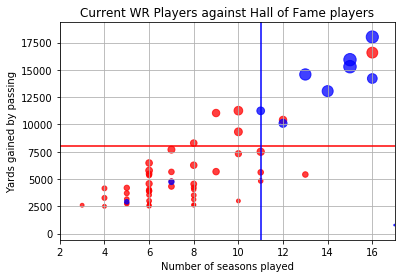

In [46]:
#Defining the scatterplot to compare the total yards and touchdowns of current and Hall of Fame Wide Recievers
x_axis =current_wr_highyds_df['No of Season']
y_axis= current_wr_highyds_df['Yds']
TD= current_wr_highyds_df['TD']
x1_axis=hof_wr_df['No of Season']
y1_axis=hof_wr_df['Yds']
TD1=hof_wr_df['TD']
#Creating a scatterplot of the Current WR versus those WR that are now in the Hall of Fame
plt.scatter(x_axis, y_axis,marker='o',facecolors= 'red',edgecolors="red", s=TD,alpha=0.75)
plt.scatter(x1_axis, y1_axis,marker='o',facecolors= 'blue',edgecolors="blue", s=TD1,alpha=0.75)
plt.xlim(2,17)
plt.grid()
plt.axhline(y=8000, color='r', linestyle='-')
plt.axvline(x=11, color='b', linestyle='-')
#add title and labels
plt.title("Current WR Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
plt.show()

### Tight End players Data 1989 - 2019 ###

In [47]:
#  reading TE players data
te_data_df = pd.read_csv(nfl_te_file)
# preview dataframe
te_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
1,2,Jason Witten,2003,2019,17,DAL,NFL,243.0,233.0,1636.0,1166,12592,10.80,70,51.8,71.30%,7.70
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
4,5,Greg Olsen,2007,2019,13,TOT,NFL,178.0,152.0,1111.0,684,8073,11.80,59,45.4,61.60%,7.27


In [48]:
#  dropping currunt players from dataframe column
filtered_te_column =te_data_df[te_data_df['To']!=2019]
filtered_te_column.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
5,6,Rob Gronkowski,2010,2018,9,NWE,NFL,115.0,100.0,794.0,521,7861,15.09,79,68.4,65.60%,9.90
8,9,Heath Miller,2005,2015,11,PIT,NFL,168.0,167.0,825.0,592,6569,11.10,45,39.1,71.80%,7.96


In [49]:
# finding staderd deviation of TE players
std_te_value = filtered_te_column['No of Season'].std()
std_te_value

3.429959009395132

In [50]:
# finding staderd deviation of TE players
mean_te_value = filtered_te_column['No of Season'].mean()
mean_te_value

4.63031914893617

In [51]:
# finding staderd deviation of TE players
median_te_value = filtered_te_column['No of Season'].median()
median_te_value

4.0

In [52]:
# Use numpy to create quartiles
te_q1 = np.percentile(filtered_te_column['No of Season'], 25)
te_q3 = np.percentile(filtered_te_column['No of Season'],75)
print(f"Q1 is {te_q1}")
print(f"Q3 is {te_q3}")

Q1 is 2.0
Q3 is 7.0


In [53]:
# Calculate the interquartile range
te_iqr = (te_q3 - te_q1)
print("interquartile range:", te_iqr)

interquartile range: 5.0


In [54]:
# Find lower boundary
te_lower_boundary = te_q1 - (1.5 * te_iqr)
te_lower_boundary

-5.5

In [55]:
# Find upper boundary
te_upper_boundary = te_q3 + (1.5 * te_iqr)
te_upper_boundary

14.5

In [56]:
# Check for any upper outliers
te_arr = filtered_te_column['No of Season']
te_arr[te_arr>= te_upper_boundary]

0      17
2      16
10     15
18     15
93     15
116    15
349    17
754    15
787    16
Name: No of Season, dtype: int64

In [57]:
# Check for any lower outliers
te_arr[te_arr<= te_lower_boundary]

Series([], Name: No of Season, dtype: int64)

In [58]:
for row in range(te_data_df.shape[0]):
   if te_data_df.loc[row,'Player'][-1] == '*':
       te_data_df.loc[row,'hof'] = 1
   else:
       te_data_df.loc[row,'hof'] = 0
te_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt,hof
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52,1.0
1,2,Jason Witten,2003,2019,17,DAL,NFL,243.0,233.0,1636.0,1166,12592,10.80,70,51.8,71.30%,7.70,0.0
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12,0.0
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN,1.0
4,5,Greg Olsen,2007,2019,13,TOT,NFL,178.0,152.0,1111.0,684,8073,11.80,59,45.4,61.60%,7.27,0.0


In [59]:
#  dropping currunt players from dataframe column
filtered_te_column =te_data_df[te_data_df['To']==2019]
filtered_te_column

current_te_highyds_df= filtered_te_column[filtered_te_column['Yds']>2000]
current_te_highyds_df
hof_te_df = te_data_df[te_data_df['hof']==1]
hof_te_df

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt,hof
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52,1.0
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN,1.0
253,254,Ozzie Newsome*,1989,1990,2,CLE,NFL,32.0,28.0,NaN,52,564,10.85,3,17.6,NaN,NaN,1.0


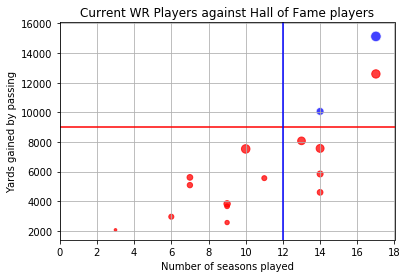

In [60]:
#  dropping Ozzie Newsome from dataframe row due to insufficent data
filtered_hof_te_df =hof_te_df[hof_te_df['Rk']!=254]
filtered_hof_te_df.head()
x_axis =current_te_highyds_df['No of Season']
y_axis= current_te_highyds_df['Yds']
TD= current_te_highyds_df['TD']
x1_axis=filtered_hof_te_df['No of Season']
y1_axis=filtered_hof_te_df['Yds']
TD1=filtered_hof_te_df['TD']
plt.scatter(x_axis, y_axis,marker='o',facecolors= 'red',edgecolors="red", s=TD,alpha=0.75)
plt.scatter(x1_axis, y1_axis,marker='o',facecolors= 'blue',edgecolors="white", s=TD1,alpha=0.75)
plt.axhline(y=9000, color='r', linestyle='-')
plt.axvline(x=12, color='b', linestyle='-')
plt.xlim(0,18)
plt.grid()
#add title and labels
plt.title("Current WR Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
plt.show()

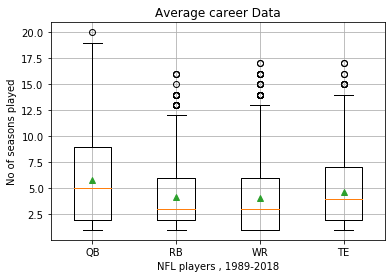

In [61]:
# Create box plot
plt.boxplot([arr, rb_arr,wb_arr,te_arr], showmeans=True)
x = [1,2,3,4]
labels = ['QB', 'RB', 'WR', 'TE']
plt.xticks(x, labels)

plt.grid()
plt.title("Average career Data")
plt.ylabel("No of seasons played")
plt.xlabel("NFL players , 1989-2018")
plt.show()